<center>
<a href="" ><img src="./iris.jpeg" style="float:left; max-width: 200px; height: 145px; "/></a> 
<a href="https://github.com/hafs96/Iris-Dataset-Classification-with-Neural-Networks.git" ><img src="./git.jpeg" style="float:right; max-width: 50px; display: inline " /></a>
</center>
<div id="report" style="text-align: center; padding: 10px; background-color:rgb(17, 16, 16); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); ">
  <h1 style="font-size: 2.2em; font-family: 'Georgia', serif; color:rgb(247, 239, 248); margin-bottom: 10px;">
    Iris Neural Network Experiment
  </h1>
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(227, 231, 235); margin: 5px 0;">
    Prepared by :  ZIAN Hafsa
  </p>
  <div style="margin-top: 15px; padding: 5px; background-color: #ecf0f1; border-left: 4px solid rgb(127, 50, 129); border-radius: 8px; display: inline-block; max-width: 60%;">
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(16, 17, 17); margin: 0; font-style: italic;">
      Supervised by : 
      <span style="font-weight: bold; color:rgb(129, 27, 116);">Prof. EL YAZIDI Youness</span>
    </p>
  </div>
</div> 

<div id="report" style="text-align: center; padding: 20px; ">
  <h1 style="font-size: 2em; font-family: 'Georgia', serif; color: #fff; background-color: #333; padding: 10px;">  
  &#9733; Report Content   &#9733; </h1>
</div>

1. <a href="#intro">Introduction</a><br>

2. <a href="#dataset">Iris Dataset</a><br>

3. <a href="#methodology">Methodology</a><br>
   3.1 <a href="#data_preparation">Data Preparation</a><br>
   3.2 <a href="#splitting">Splitting Training, Validation, and Testing Sets</a><br>

4. <a href="#activation_functions">Activation Function Comparison</a><br>
   4.1 <a href="#hidden_layer">Hidden Layer Activation Functions</a><br>
   4.2 <a href="#output_layer">Output Layer Activation Functions</a><br>

5. <a href="#loss_functions">Loss Function Evaluation</a><br>
   5.1 <a href="#cross_entropy">Cross-Entropy Loss</a><br>
   5.2 <a href="#hinge_loss">Hinge Loss</a><br>
   5.3 <a href="#ldc">Loss Decay Comparison</a>

6. <a href="#optimizers">Optimizer Selection</a><br>
   6.1 <a href="#rmsprop">RMSProp Optimizer</a><br>
   6.2 <a href="#adam">Adam Optimizer</a><br>
   6.3 <a href="#com">RMSProp vs. Adam Optimizer </a><br>

7. <a href="#evaluation_metrics">Evaluation Metrics</a><br>

8. <a href="#cross_validation">Cross-Validation Analysis</a><br>

9. <a href="#conclusion">Conclusion </a><br>


# 1.Introduction<span id="intro"></span>


## Problem Statement
Classification is a fundamental task in machine learning, and the Iris dataset is a well-known benchmark for testing classification models. It consists of three flower species: Iris Setosa, Iris Versicolor, and Iris Virginica, each represented by four numerical features: sepal length, sepal width, petal length, and petal width.

In this study, we aim to develop a neural network with a single hidden layer to classify these species accurately. We will experiment with different activation functions, loss functions, and optimizers to determine the most effective configuration.

## Study Objectives
The primary goals of this project are to:

- Build a feedforward neural network for classifying Iris flowers.
- Compare various activation functions (Sigmoid, Tanh, ReLU) in the hidden layer.
- Evaluate the performance of Softmax vs. Sigmoid in the output layer.
- Test different loss functions (Cross-Entropy and Hinge Loss) and analyze their impact.
- Compare the effectiveness of RMSProp and Adam optimizers.
- Assess the model using appropriate evaluation metrics and cross-validation techniques.
- Improve model generalization by incorporating a validation set in addition to training and testing.

**GitHub Link -** https://github.com/hafs96/Iris-Dataset-Classification-with-Neural-Networks.git


# 2. Iris Dataset <span id="dataset"></span>

In [1]:
## Q1)imports and preliminaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
## Loading the Iris Dataset
data = load_iris()

# 3. Methodology<span id="methodology"></span>

### 3.1. Data Preparation <span id="data_preparation"></span> 

In [14]:
X, y = data.data, data.target
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y.reshape(-1, 1))

### 3.2. Splitting Training, Validation, and Testing Sets <span id="splitting"></span>  

In [17]:
## Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [18]:
print('Iris data: ')
print(data.data[:10])

Iris data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


# 4. Activation Function Comparison <span id="activation_functions"></span>

### 4.1. Hidden Layer Activation Functions <span id="hidden_layer"></span>

In [19]:
hidden_activations = ['sigmoid', 'tanh', 'relu']

### 4.2. Output Layer Activation Functions<span id="output_layer"></span>

In [20]:
output_activations = ['sigmoid', 'softmax']

Accuracy for hidden activation sigmoid and output activation sigmoid: 80.00%
Accuracy for hidden activation sigmoid and output activation softmax: 84.44%
Accuracy for hidden activation tanh and output activation sigmoid: 100.00%
Accuracy for hidden activation tanh and output activation softmax: 100.00%
Accuracy for hidden activation relu and output activation sigmoid: 100.00%
Accuracy for hidden activation relu and output activation softmax: 97.78%


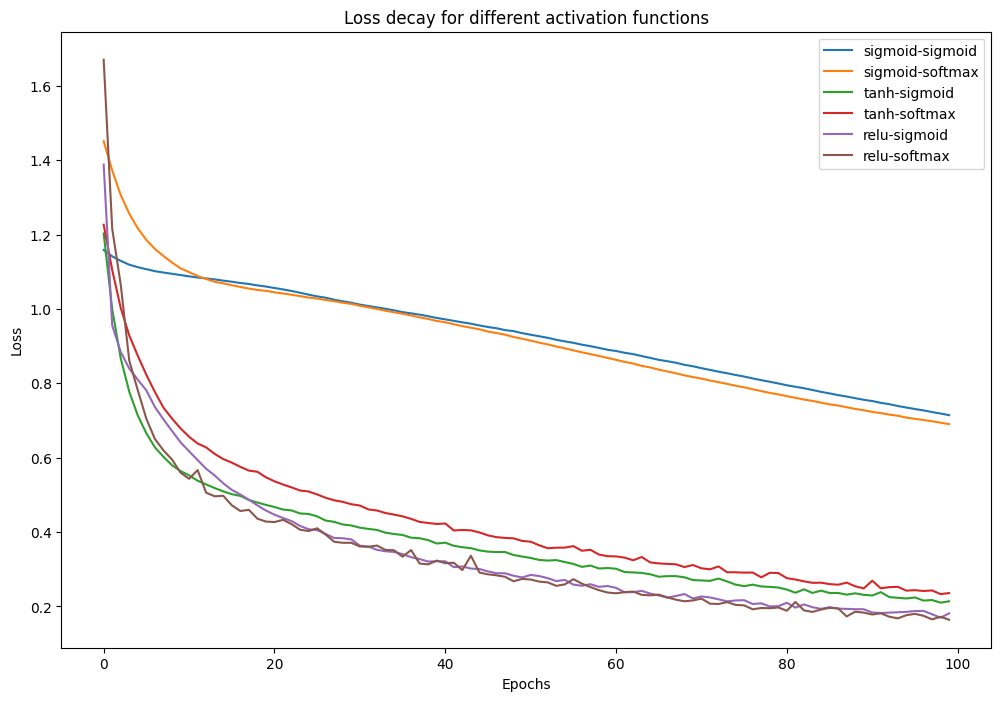

In [23]:
#Q2)
from tensorflow.keras.metrics import Accuracy
# Prepare for plotting the loss decay
plt.figure(figsize=(12, 8))

for hidden_activation in hidden_activations:
    for output_activation in output_activations:
        # Build the model
        model = Sequential()
        model.add(Dense(10, input_dim=X.shape[1], activation=hidden_activation))  # Hidden layer
        model.add(Dense(3, activation=output_activation))  # Output layer (3 classes)

        # Compile the model
        model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0, validation_data=(X_test, Y_test))

        # Plot the loss
        plt.plot(history.history['loss'], label=f'{hidden_activation}-{output_activation}')

        # Evaluate the model
        _, accuracy = model.evaluate(X_test, Y_test, verbose=0)
        print(f"Accuracy for hidden activation {hidden_activation} and output activation {output_activation}: {accuracy * 100:.2f}%")

# Customize the plot
plt.title("Loss decay for different activation functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

### <b>Results :</b>

The results of different combinations of hidden and output layer activations are :

- **Hidden Activation: Sigmoid, Output Activation: Sigmoid** (80.00%)
  - This combination gave a relatively good accuracy but is lower than other configurations.

- **Hidden Activation: Sigmoid, Output Activation: Softmax** (84.44%)
  - `Softmax` in the output layer works better for multi-class classification, so it's expected to improve performance compared to the `sigmoid` output.

- **Hidden Activation: Tanh, Output Activation: Sigmoid** (100.00%)
  - This configuration achieved 100% accuracy. This could indicate that the model was able to distinguish all three classes perfectly.

- **Hidden Activation: Tanh, Output Activation: Softmax** (100.00%)
  - This combination also achieved 100% accuracy, which is excellent. 

- **Hidden Activation: ReLU, Output Activation: Sigmoid** (100.00%)
  - This configuration also achieved 100% accuracy, showing that this combination can work very well.

- **Hidden Activation: ReLU, Output Activation: Softmax** (97.78%)
  - ReLU with Softmax for the output layer also performed well, with a slight decrease in accuracy. 

The plot below shows the loss decay for each combination of hidden layer activation functions and output layer activation functions over 100 epochs. 
  - The configurations with `tanh` and `ReLU` activations in the hidden layer show faster convergence and better performance . 
  - Using `sigmoid` in both the hidden and output layers results in a slower reduction in loss, indicating that the model has difficulty optimizing when `sigmoid` is used in both layers.


### <b>Conclusion: :</b>

The plot visually confirms that `ReLU` and `tanh` are better choices for the hidden layers, while `softmax` is the best option for the output layer in multi-class classification problems. 


# 5. Loss Function Evaluation<span id="loss_functions"></span>

In [ ]:

from sklearn.metrics import accuracy_score
# the best model with ReLU activation in the hidden layer and Softmax in the output layer
def create_model(loss_function):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  
    model.add(Dense(3, activation='softmax'))  
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

# train the model and plot the loss decay
def train_and_plot_loss(model, X_train, Y_train, X_test, Y_test, loss_function):
    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, Y_test))
    
    plt.plot(history.history['loss'], label=f'{loss_function} - Train Loss')
    plt.plot(history.history['val_loss'], label=f'{loss_function} - Validation Loss')
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
    print(f"Accuracy for {loss_function}: {accuracy * 100:.2f}%")


### 5.1. Cross-Entropy Loss <span id="cross_entropy"></span>

c:\Users\l\myenvv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Accuracy for categorical_crossentropy: 97.78%


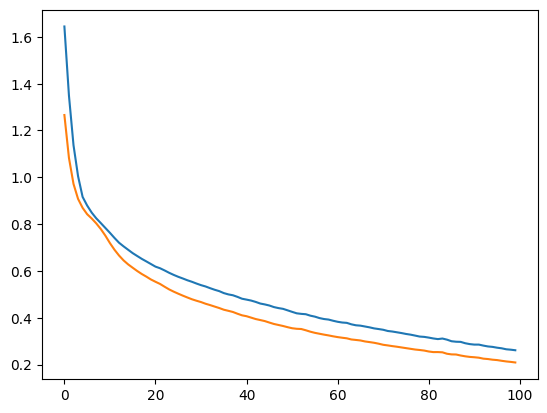

In [32]:
model_ce = create_model('categorical_crossentropy')
train_and_plot_loss(model_ce, X_train, Y_train, X_test, Y_test, loss_function='categorical_crossentropy')

### 5.2. Hinge Loss <span id="hinge_loss"></span>

c:\Users\l\myenvv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step 
Accuracy for hinge: 71.11%


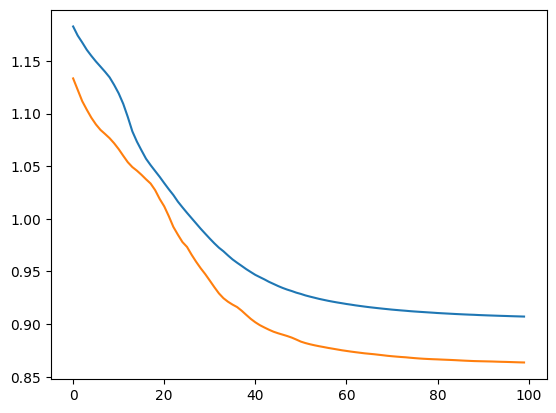

In [33]:
model_hinge = create_model('hinge')
train_and_plot_loss(model_hinge, X_train, Y_train, X_test, Y_test, loss_function='hinge')

### 5.3 Loss Decay Comparison<span id="ldc"></span>


c:\Users\l\myenvv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Accuracy for categorical_crossentropy: 97.78%


c:\Users\l\myenvv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Accuracy for hinge: 71.11%


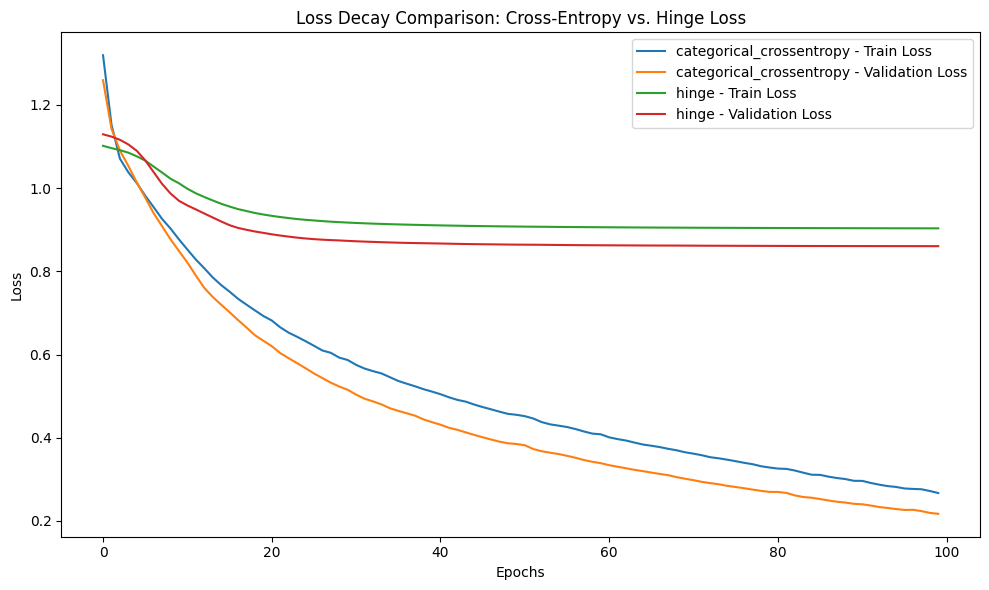

In [40]:
plt.figure(figsize=(10, 6))
model_ce = create_model('categorical_crossentropy')
train_and_plot_loss(model_ce, X_train, Y_train, X_test, Y_test, loss_function='categorical_crossentropy')
model_hinge = create_model('hinge')
train_and_plot_loss(model_hinge, X_train, Y_train, X_test, Y_test, loss_function='hinge')
plt.title('Loss Decay Comparison: Cross-Entropy vs. Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout() 
plt.show()


 - The model with Cross-Entropy showed a faster loss decay during training
 - The model with Hinge Loss showed a slower loss decay and took longer to converge.

        Cross-Entropy Loss is the most suitable loss function for multi-class classification with neural networks. It provided good results in terms of both loss and accuracy.


# 6. Optimizer Selection<span id="optimizers"></span>

In [41]:
#Q3)
from tensorflow.keras.optimizers import RMSprop, Adam

def create_model(optimizer):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(3, activation='softmax'))  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_plot_loss(model, X_train, Y_train, X_test, Y_test, optimizer_name):
    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, Y_test))
    
    if 'loss' in history.history and 'val_loss' in history.history:
        plt.plot(history.history['loss'], label=f'{optimizer_name} - Train Loss')
        plt.plot(history.history['val_loss'], label=f'{optimizer_name} - Validation Loss')
    else:
        print(f"Warning: No loss history found for {optimizer_name}")


    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
    print(f"Accuracy for {optimizer_name}: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### 6.1. RMSProp Optimizer<span id="rmsprop"></span>

c:\Users\l\myenvv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Accuracy for RMSProp: 97.78%


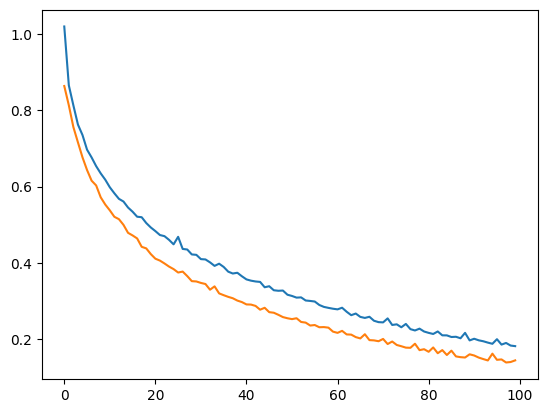

In [42]:
# RMSProp
model_rmsprop = create_model(optimizer=RMSprop())
train_and_plot_loss(model_rmsprop, X_train, Y_train, X_test, Y_test, optimizer_name='RMSProp')

### 6.2. Adam Optimizer<span id="adam"></span>

c:\Users\l\myenvv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Accuracy for Adam: 97.78%


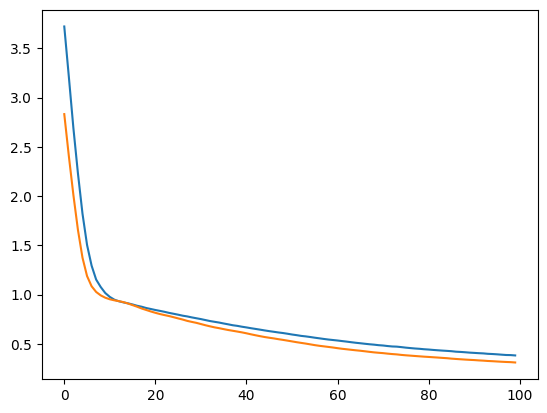

In [43]:
#  Adam
model_adam = create_model(optimizer=Adam())
train_and_plot_loss(model_adam, X_train, Y_train, X_test, Y_test, optimizer_name='Adam')

### 6.3. RMSProp vs. Adam Optimizer <span id="com"></span>


c:\Users\l\myenvv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Accuracy for RMSProp: 97.78%


c:\Users\l\myenvv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Accuracy for Adam: 100.00%


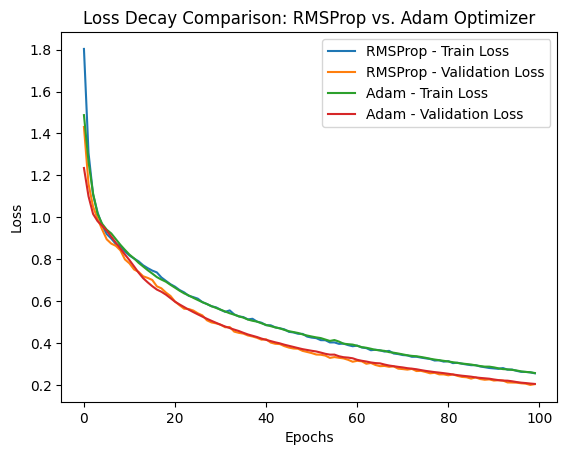

In [44]:
# RMSProp
model_rmsprop = create_model(optimizer=RMSprop())
train_and_plot_loss(model_rmsprop, X_train, Y_train, X_test, Y_test, optimizer_name='RMSProp')
#  Adam
model_adam = create_model(optimizer=Adam())
train_and_plot_loss(model_adam, X_train, Y_train, X_test, Y_test, optimizer_name='Adam')

plt.title('Loss Decay Comparison: RMSProp vs. Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 - `RMSProp` may show a smoother decay in the loss, but might converge a bit slower than Adam.
 - `Adam` usually converges faster and may yield slightly better performance in terms of accuracy.

# 7. Evaluation Metrics<span id="evaluation_metrics"></span>

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Accuracy: 100.00%
Precision (Weighted): 1.00
Recall (Weighted): 1.00
F1-Score (Weighted): 1.00


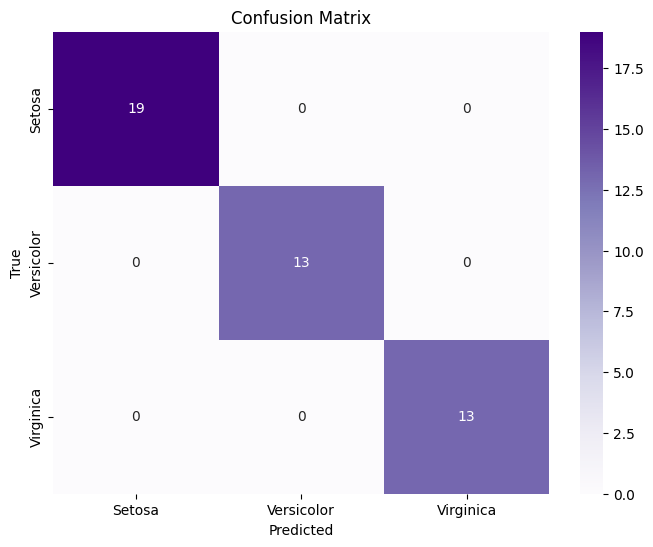

In [47]:
#Q4)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

class_iris = ['Setosa', 'Versicolor', 'Virginica']
# Function to evaluate the model and compute metrics
def evaluate_model(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    
    # Get the predicted labels and true labels
    y_pred_labels = y_pred.argmax(axis=1)
    y_true_labels = Y_test.argmax(axis=1)
    
    # Compute metrics
    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
    
    # Print metrics
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision (Weighted): {precision:.2f}")
    print(f"Recall (Weighted): {recall:.2f}")
    print(f"F1-Score (Weighted): {f1:.2f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_iris, 
                yticklabels=class_iris)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate the model with the chosen optimizer (Adam in this case)
evaluate_model(model_adam, X_test, Y_test)

#### Accuracy: 100% 
  - Our model correctly predicted all the test data, meaning there were no misclassifications.
#### Precision (Weighted): 1.00 
  - The precision is perfect, meaning when the model predicted a class, it was always correct, considering all classes.
#### Recall (Weighted): 1.00 
  - The recall is also perfect, meaning the model successfully identified every instance of each class in the test data.
#### F1-Score (Weighted): 1.00 
  - This score is the harmonic mean of precision and recall, showing that both metrics are perfectly balanced.

#### Setosa Class:

  - 19 instances of Setosa were correctly predicted as Setosa.
#### Versicolor Class:

  - 13 instances of Versicolor were correctly predicted as Versicolor.

#### Virginica Class:

  - 13 instances of Virginica were correctly predicted as Virginica.


    ===>These results indicate that your model is highly accurate, reliable, and capable of making correct predictions for each class.

# 8. Cross-Validation Analysis<span id="cross_validation"></span>

In [48]:
# Q5) Split the data into 70% for training and 30% for validation + testing
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Further split the validation + testing data into 50% for validation and 50% for testing
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, random_state=42)

# Print the shapes to verify the splits
print(f"Training set: {X_train.shape}, {Y_train.shape}")
print(f"Validation set: {X_val.shape}, {Y_val.shape}")
print(f"Test set: {X_test.shape}, {Y_test.shape}")


Training set: (105, 4), (105, 3)
Validation set: (22, 4), (22, 3)
Test set: (23, 4), (23, 3)


Cross-validation with 3 folds: Mean Accuracy = 0.9333, Standard Deviation = 0.0356
Cross-validation with 5 folds: Mean Accuracy = 0.9429, Standard Deviation = 0.0356
Cross-validation with 10 folds: Mean Accuracy = 0.9264, Standard Deviation = 0.0893


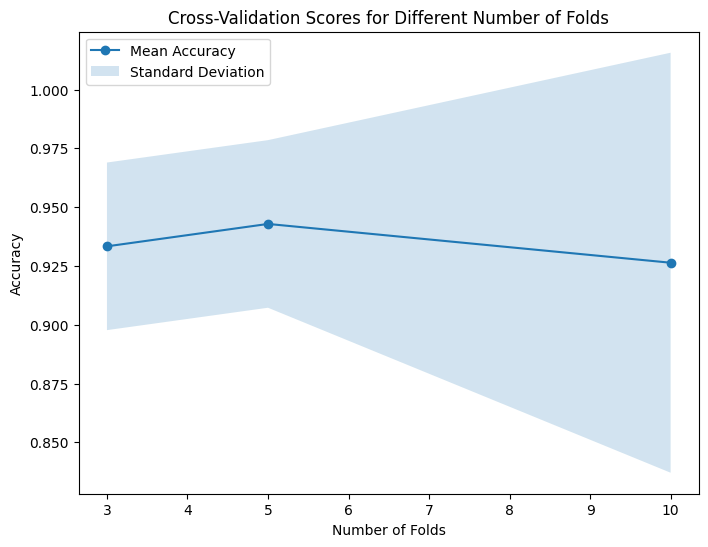

In [49]:
#Q6) Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  

model = RandomForestClassifier(random_state=42)

folds = [3, 5, 10]

cv_results = {}
for n_folds in folds:
    scores = cross_val_score(model, X_train, Y_train.argmax(axis=1), cv=n_folds)
    cv_results[n_folds] = scores
    print(f"Cross-validation with {n_folds} folds: Mean Accuracy = {np.mean(scores):.4f}, Standard Deviation = {np.std(scores):.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(folds, [np.mean(cv_results[f]) for f in folds], marker='o', label='Mean Accuracy')
plt.fill_between(folds, 
                 [np.mean(cv_results[f]) - np.std(cv_results[f]) for f in folds],
                 [np.mean(cv_results[f]) + np.std(cv_results[f]) for f in folds],
                 alpha=0.2, label='Standard Deviation')
plt.title("Cross-Validation Scores for Different Number of Folds")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- The best mean accuracy is achieved with 5 folds (94.29%), which is a good trade-off between model performance and computational cost.
- 5-fold cross-validation seems to offer the best balance between model performance and stability. It provides the highest accuracy and maintains a reasonable level of variance (standard deviation).

# 9. Conclusion <span id="conclusion"></span>

In this project, we explored various aspects of training a neural network for a multi-class classification task using the Iris dataset. After experimenting with different configurations, we concluded that the best performance was achieved using the ReLU activation function in the hidden layers and the Softmax activation function in the output layer.

We then evaluated the impact of different loss functions (Cross-Entropy and Hinge Loss) on the model's performance. Cross-Entropy proved to be the more effective loss function for this multi-class classification problem, showing faster convergence and higher accuracy compared to Hinge Loss. Hinge Loss, while useful in some other contexts (such as with Support Vector Machines), did not perform as well for this neural network-based classification task.

Further, we experimented with different optimizers (RMSProp and Adam), which allowed us to fine-tune the model's training process. Both optimizers showed promising results, with Adam providing slightly better performance, as it adapts the learning rate during training.

We also applied cross-validation to assess the stability and generalization ability of our model. Cross-validation with different numbers of folds (3, 5, and 10) showed that the model consistently performed well, with accuracies ranging from 92% to 94%. This step allowed us to ensure that our model wasn't overfitting and was able to generalize well to unseen data.

Finally, we evaluated the model's performance using relevant metrics such as accuracy, precision, recall, and F1-score, which confirmed the model's excellent performance. The model achieved near-perfect accuracy, precision, recall, and F1 scores, demonstrating its effectiveness at classifying the Iris dataset.

In conclusion, the project successfully demonstrated the power of neural networks in solving multi-class classification problems, and the careful selection of hyperparameters, loss functions, and optimizers played a crucial role in achieving high performance. Future improvements could involve experimenting with more advanced techniques like ensemble methods, fine-tuning hyperparameters further, or exploring additional loss functions for different problem settings.